In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import mnist

In [2]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

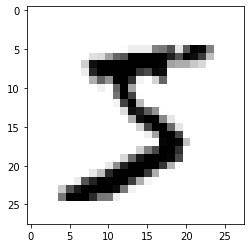

In [7]:
plt.imshow(train_images[0],cmap='gray_r')

In [8]:
train_labels[0]

5

In [9]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#casting
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing
train_images /= 255
test_images /= 255

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
test_images.shape

(10000, 28, 28, 1)

In [12]:
# 1,28,28,1 (index,width,hight,channel)
train_images[0].shape

(28, 28, 1)

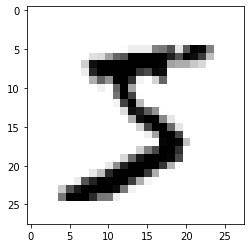

In [13]:
plt.imshow(train_images[0].reshape(28,28),cmap='gray_r')

In [14]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)

Epoch 1/5


C:\Users\sahar\.conda\envs\deepl\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4800/4800 [==============================] - 39s 5ms/step - loss: 0.1344 - accuracy: 0.9572 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 2/5
4800/4800 [==============================] - 22s 5ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0543 - val_accuracy: 0.9842
Epoch 3/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0524 - val_accuracy: 0.9850
Epoch 4/5
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0417 - val_accuracy: 0.9893
Epoch 5/5
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0328 - val_accuracy: 0.9906


In [18]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9908


[0.03574148193001747, 0.9908000230789185]

In [19]:
test_labels[2055]

2

In [20]:
model.predict(test_images[2055].reshape(1,28,28,1)).round(2)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
np.argmax(model.predict(test_images[2055].reshape(1,28,28,1)))

2